In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
df = pd.read_csv('hr_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [2]:
from sklearn.utils import shuffle
joined_counts = df['Status'].value_counts()['Joined'];
not_joined_counts = df['Status'].value_counts()['Not Joined'];
joined_precentage = (joined_counts)/(joined_counts + not_joined_counts)
not_joined_percentage = 1 - joined_precentage

print("percentage of people who joined : ", 100*joined_precentage)
print("percentage of people who not joined : ", 100*not_joined_percentage)


#1. Upsampling the dataset as not joined are less than 33%
joined = df[df.Status == 'Joined']
not_joined = df[df.Status == 'Not Joined']

# Upsampling the Not joined cases
upsampled_not_joined = resample(not_joined, replace = True, n_samples = 4000)

# Combining the upsampled
dfs = [joined, upsampled_not_joined]
new_df = pd.concat(dfs)
new_df = shuffle(new_df)

percentage of people who joined :  81.30072262367982
percentage of people who not joined :  18.69927737632018


In [3]:
from sklearn import metrics
def draw_roc_curve( model, test_X, test_y ):
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    ## selecting the probabilities that the test example belongs
    ## to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    ## Invoke roc_curve() to return fpr, tpr and threshold values.
    ## Threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    ## Getting roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual,
    test_results_df.chd_1 )
    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## Plotting the actual fpr and tpr values
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    ## Plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')

def draw_cm( actual, predicted ):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Joined", "Not Joined"], yticklabels=["Joined", "Not Joined"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    


In [4]:
# 10.1 (iv) Making the svm model using a linear kernel
X_features = new_df[['DOJ Extended', 'Duration to accept offer', 'Notice period', 'Offered band', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age']]
Y_features = new_df['Status']

X = pd.get_dummies(X_features, drop_first=True)
Y = new_df.Status.map(lambda x: int(x == 'Joined'))

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model.fit(train_X, train_Y)

SVC(kernel='linear', probability=True)

TypeError: cannot unpack non-iterable NoneType object

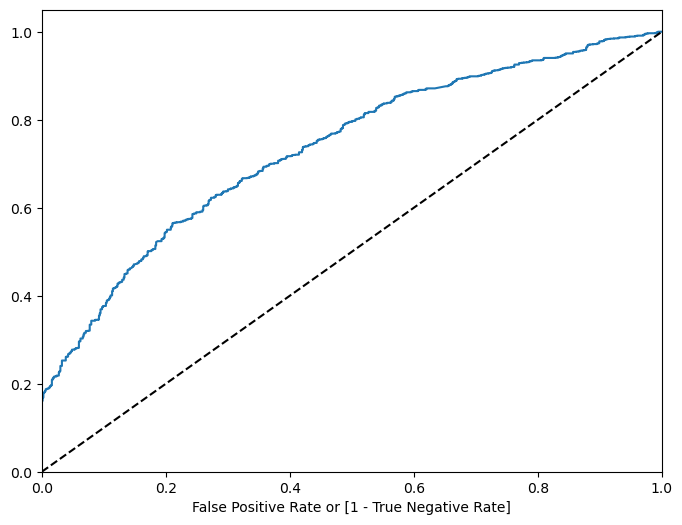

In [5]:
# Making ROC curve of SVM linear kernel
roc_auc_score, _, _, _ = draw_roc_curve( svm_model, test_X, test_Y);

In [ ]:
print("roc_auc_score : ", roc_auc_score)

In [ ]:
# Analysing SMVM model with linear kernel using confusion matrix
pred_Y_SVM_linear = svm_model.predict(test_X)
draw_cm(test_Y, pred_Y_SVM_linear)

In [ ]:
# Printing the model summary of SVM linear kernel
print( metrics.classification_report( test_Y, pred_Y_SVM_linear ) )

In [ ]:
# Making the svm model with rbf kernel
svm_model_rbf = SVC(kernel='rbf',C=1.0, gamma='scale', probability=True)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model_rbf.fit(train_X, train_Y)

In [ ]:
# Making ROC curve of SVM linear kernel
roc_auc_score_rbf, _, _, _ = draw_roc_curve( svm_model_rbf, test_X, test_Y);

In [ ]:
print("roc_auc_score : ", roc_auc_score_rbf)

In [ ]:
# Analysing SMVM model with rbf kernel using confusion matrix
pred_Y_SVM_rbf = svm_model_rbf.predict(test_X)
draw_cm(test_Y, pred_Y_SVM_rbf)

In [ ]:
# Printing the model summary of SVM rbf kernel
print( metrics.classification_report( test_Y, pred_Y_SVM_rbf ) )

In [ ]:
# Making the svm model with poly kernel
svm_model_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', probability=True)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model_poly.fit(train_X, train_Y)

In [ ]:
# Making ROC curve of SVM poly kernel
roc_auc_score_poly, _, _, _ = draw_roc_curve( svm_model_poly, test_X, test_Y);

In [ ]:
print("roc_auc_score : ", roc_auc_score_poly)

In [ ]:
# Analysing SMVM model with poly kernel using confusion matrix
pred_Y_SVM_poly = svm_model_poly.predict(test_X)
draw_cm(test_Y, pred_Y_SVM_poly)

In [ ]:
# Printing the model summary of SVM poly kernel
print( metrics.classification_report( test_Y, pred_Y_SVM_poly ) )

In [ ]:
# Making the svm model with sigmoid kernel
svm_model_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale', probability=True)  # You can change the kernel as needed (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model_sigmoid.fit(train_X, train_Y)

In [ ]:
# Making ROC curve of SVM sigmoid kernel
roc_auc_score_sigmoid, _, _, _ = draw_roc_curve( svm_model_sigmoid, test_X, test_Y);

In [ ]:
print("roc_auc_score : ", roc_auc_score_sigmoid)

In [ ]:
# Analysing SMVM model with sigmoid kernel using confusion matrix
pred_Y_SVM_sigmoid = svm_model_sigmoid.predict(test_X)
draw_cm(test_Y, pred_Y_SVM_sigmoid)

In [ ]:
# Printing the model summary of SVM sigmoid kernel
print( metrics.classification_report( test_Y, pred_Y_SVM_sigmoid) )
